In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score




In [2]:
#data, clusters = make_blobs(n_samples = 1000, centers = 12, cluster_std = 0.50, random_state = 0)
#make_blobs makes a group of 1000 samples centered around 12 points
#data.shape
#data._get_numeric_data()

In [3]:
data = pd.read_csv('animals.csv')
print("Before dropping ", data.shape)

data['Comments'] = data['Comments'].isna().astype(int) #Look at dropping this column
data.dropna(inplace=True)

data.head()
X = data._get_numeric_data()
print("After dropping ", X.shape)
X.dropna(inplace=True)
ss = StandardScaler()

X = ss.fit_transform(X)

X = data._get_numeric_data()

X.dropna(inplace=True)

ss = StandardScaler()

X = ss.fit_transform(X)

Before dropping  (344, 10)
After dropping  (330, 7)


In [4]:
model = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
#Threshold – The maximum number of data samples to be considered in a  subcluster of the leaf node in a CF tree.
#Branching_factor – It is the factor that is used to specify the number of CF sub-clusters that can be made in a node
#N_clusters – number of clusters
X

array([[-0.83610831,  0.14908923, -1.0983272 , ...,  0.39238534,
         1.26742778,  0.21821789],
       [-0.68901208,  0.45278952, -0.45276381, ..., -0.66282332,
         0.45617637,  0.21821789],
       [-1.35094509,  1.1108068 , -0.59622234, ...,  0.0601312 ,
         0.46730681,  0.21821789],
       ...,
       [ 1.16807774, -0.71139491,  1.48392634, ..., -0.78361826,
        -0.4435976 ,  0.21821789],
       [ 0.21195229, -1.16694534,  0.76663369, ..., -0.89107221,
        -0.54336496,  0.21821789],
       [ 1.0761426 , -0.50892805,  0.83836295, ..., -0.67064641,
        -0.58862366,  0.21821789]])

In [5]:
model.fit(X)


Birch(n_clusters=4, threshold=1.5)

In [6]:
pred = model.predict(X);

Text(0, 0.5, 'Culmen Depth')

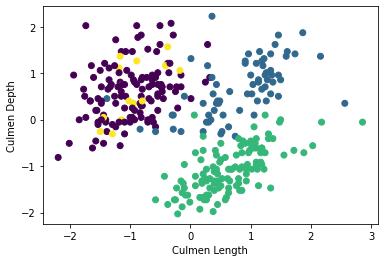

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = pred)

plt.xlabel('Culmen Length') 
plt.ylabel('Culmen Depth') 

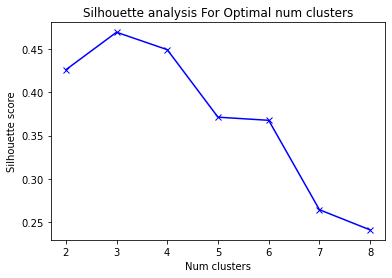

In [8]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise birch
    model = Birch(branching_factor = 50, n_clusters = num_clusters, threshold = 0.5)
    model.fit(X)
    cluster_labels = model.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    

plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Num clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal num clusters')
plt.show()